 Segmenting and Clustering Neighbourhoods in the City of Toronto
 ====================


## Importing libraries


In [88]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge  folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

# Scraping the dataset 
using https://simpleanalytical.com/how-to-web-scrape-wikipedia-python-urllib-beautiful-soup-pandas

In [569]:
#Scraping the wikipedia page
# import the library we use to open URLs
import urllib.request

# specify which URL/web page we are going to be scraping
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M "

# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

#print(soup.prettify())

## Creating dataframe in python 

In [673]:
soup.title
soup.title.string

# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table")
all_tables

right_table=soup.find('table', class_='wikitable sortable')
right_table

#Looping through the rows

A=[]
B=[]
C=[]


for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
    
#Intorduce pandas and put into a dataframe
import pandas as pd
df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighbourhood']=C

import pandas as pd
df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighbourhood']=C


## Cleaning the dataframe 

In [674]:
#Drop rows with Borough = not assigned
df = df.drop(df[df['Borough']== 'Not assigned\n'].index)
#reset index of rows 
df.reset_index(inplace = True, drop=True)
df

#Set neightbourhoods with not assigned to the borough
for i in range(0, len(df['Neighbourhood'])):
    if df['Neighbourhood'][i] == 'Not assigned\n':
        df[Neighbourhood][i] == df['Borough'][i]


In [572]:
df.shape

(103, 3)

## Sorting Postal Codes into Ascending Order and Adding Latitude & Longitude

In [675]:
#Sort Postal Codes into ascending order 
df = df.sort_values('PostalCode')
df.reset_index(inplace = True, drop=True)
df1 = pd.read_csv("http://cocl.us/Geospatial_data")
df["Latitude"] ,df["Longitude"]= df1["Latitude"],df1["Longitude"]


## Use Geopy library to get the latitude and longitude values of Toronto


In [576]:
#Seeing the shap of our dataframe
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

#Get the coordinates for Toronto

address = "Toronto, ON"
geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Ontorio are {}, {}.'.format(latitude, longitude))

The dataframe has 10 boroughs and 103 neighborhoods.
The geograpical coordinate of Toronto, Ontorio are 43.6534817, -79.3839347.


## Create a map of Toronto with neighbourhood superimposed on top


In [676]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto
# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [ ]:
PATH = "/Desktop/projects/github-example/"
Image(filename = PATH + "Toronto1.png", width=100, height=100)

## Define Foursquare credentials and version

In [578]:
CLIENT_ID = 'HM1MKHHPWTN40OXSJ5EUHQIEYA3L3OKYYNK5A1WYW1FIUKV1' # your Foursquare ID
CLIENT_SECRET = 'KKO2J0AGVD2OOJIOO4JANYEXL5NI22HGSXFHLP3WLWNLKOAH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HM1MKHHPWTN40OXSJ5EUHQIEYA3L3OKYYNK5A1WYW1FIUKV1
CLIENT_SECRET:KKO2J0AGVD2OOJIOO4JANYEXL5NI22HGSXFHLP3WLWNLKOAH


set df to toronto_df

In [579]:
toronto_df = df

## Explore Neighbourhoods in Toronto


Looking at the first element in our dataframe.

In [580]:
toronto_df.loc[0, 'Neighbourhood']

'Malvern, Rouge\n'

Retreiving the latitude and longitude for this  element.

In [581]:
neighbourhood_latitude = toronto_df.loc[0, 'Latitude'] # neighborhood latitude value
neighbourhood_longitude = toronto_df.loc[0, 'Longitude'] # neighborhood longitude value

neighbourhood_name = toronto_df.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Malvern, Rouge
 are 43.806686299999996, -79.19435340000001.


Retreiving the top 100 venues in this neighbourhood within a radius of 500m.

In [677]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
url # display URL

results = requests.get(url).json()


In [583]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [584]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
nearby_venues.head()

1 venues were returned by Foursquare.


,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056


## Explore Neighbourhoods in Toronto

Create a function to repeat the same process for all the neighbourhoods in Toronto.

In [585]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [586]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude'])


Malvern, Rouge

Rouge Hill, Port Union, Highland Creek

Guildwood, Morningside, West Hill

Woburn

Cedarbrae

Scarborough Village

Kennedy Park, Ionview, East Birchmount Park

Golden Mile, Clairlea, Oakridge

Cliffside, Cliffcrest, Scarborough Village West

Birch Cliff, Cliffside West

Dorset Park, Wexford Heights, Scarborough Town Centre

Wexford, Maryvale

Agincourt

Clarks Corners, Tam O'Shanter, Sullivan

Milliken, Agincourt North, Steeles East, L'Amoreaux East

Steeles West, L'Amoreaux West

Upper Rouge

Hillcrest Village

Fairview, Henry Farm, Oriole

Bayview Village

York Mills, Silver Hills

Willowdale, Newtonbrook

Willowdale, Willowdale East

York Mills West

Willowdale, Willowdale West

Parkwoods

Don Mills

Don Mills

Bathurst Manor, Wilson Heights, Downsview North

Northwood Park, York University

Downsview

Downsview

Downsview

Downsview

Victoria Village

Parkview Hill, Woodbine Gardens

Woodbine Heights

The Beaches

Leaside

Thorncliffe Park

East Toronto, Broadview N

Check the size of the resulting dataframe

In [587]:
print(toronto_venues.shape)
toronto_venues.head()

(2132, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


Check how many venues were returned for each neighbourhood


In [588]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Berczy Park,56,56,56,56,56,56
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16


Let's find out how many unique categories can be curated from all the returned venues

In [589]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 280 uniques categories.


## Analyse each neighbourhood

In [590]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 


# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()


,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,

Examine dataframe size


In [591]:
toronto_onehot.shape

(2132, 281)

 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [678]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fireworks Store,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,

Confirm the new size

In [593]:
toronto_grouped.shape

(95, 281)

## Print the top 5 most common venues for each neighbourhood

In [594]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt
----
                       venue  freq
0  Latin American Restaurant   0.2
1             Clothing Store   0.2
2             Breakfast Spot   0.2
3                     Lounge   0.2
4               Skating Rink   0.2


----Alderwood, Long Branch
----
                venue  freq
0         Pizza Place  0.22
1            Pharmacy  0.11
2                 Gym  0.11
3  Athletics & Sports  0.11
4        Dance Studio  0.11


----Bathurst Manor, Wilson Heights, Downsview North
----
                       venue  freq
0                       Bank  0.10
1                Coffee Shop  0.10
2                Gas Station  0.05
3                      Diner  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village
----
                        venue  freq
0         Japanese Restaurant  0.25
1                        Bank  0.25
2          Chinese Restaurant  0.25
3                        Café  0.25
4  Modern European Restaurant  0.00


----Bedford Park, Lawrence Manor East
----
            

                       venue  freq
0               Food Service   0.5
1             Baseball Field   0.5
2          Accessories Store   0.0
3  Middle Eastern Restaurant   0.0
4        Monument / Landmark   0.0


----Humewood-Cedarvale
----
                       venue  freq
0               Tennis Court  0.25
1                      Field  0.25
2               Hockey Arena  0.25
3                      Trail  0.25
4  Middle Eastern Restaurant  0.00


----India Bazaar, The Beaches West
----
                  venue  freq
0  Fast Food Restaurant  0.10
1        Sandwich Place  0.10
2         Movie Theater  0.05
3                   Pub  0.05
4     Fish & Chips Shop  0.05


----Kennedy Park, Ionview, East Birchmount Park
----
               venue  freq
0  Convenience Store   0.2
1     Discount Store   0.2
2        Bus Station   0.2
3   Department Store   0.2
4        Coffee Shop   0.2


----Kensington Market, Chinatown, Grange Park
----
                           venue  freq
0                  

                venue  freq
0  Chinese Restaurant  0.12
1            Pharmacy  0.06
2   Electronics Store  0.06
3         Pizza Place  0.06
4      Breakfast Spot  0.06


----Stn A PO Boxes
----
                venue  freq
0         Coffee Shop  0.10
1                Café  0.04
2            Beer Bar  0.03
3        Cocktail Bar  0.03
4  Seafood Restaurant  0.03


----Studio District
----
         venue  freq
0         Café  0.10
1  Coffee Shop  0.07
2      Brewery  0.05
3       Bakery  0.05
4    Gastropub  0.05


----Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
----
                 venue  freq
0                  Pub  0.12
1   Light Rail Station  0.12
2          Coffee Shop  0.12
3  Fried Chicken Joint  0.06
4          Pizza Place  0.06


----The Annex, North Midtown, Yorkville
----
            venue  freq
0            Café  0.14
1  Sandwich Place  0.14
2     Coffee Shop  0.09
3        Pharmacy  0.05
4   Grocery Store  0.05


----The Beaches
----
                    

## Sort venues in descending order

In [595]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Create a new dataframe to show top 10 venues for each neighbourhood 

In [653]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Clothing Store,Lounge,Breakfast Spot,Latin American Restaurant,Skating Rink,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
1,"Alderwood, Long Branch",Pizza Place,Dance Studio,Gym,Sandwich Place,Pharmacy,Coffee Shop,Athletics & Sports,Pub,Doner Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Ice Cream Shop,Supermarket,Sushi Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Deli / Bodega,Fried Chicken Joint,Diner
3,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Yoga Studio,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Restaurant,Sandwich Place,Italian Restaurant,Greek Restaurant,Thai Restaurant,Pharmacy,Pizza Place,Pub,Café


# Cluster Neighbourhoods

## Checking optimal k using elbow method

https://nbviewer.jupyter.org/github/eklavyasaxena/The-Battle-of-Neighborhoods/blob/master/Exploring-the-Taste-of-NYC-Neighborhoods/Project_Notebook.ipynb

In [597]:
sum_of_squared_distances = []
K = range(1,30)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(toronto_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

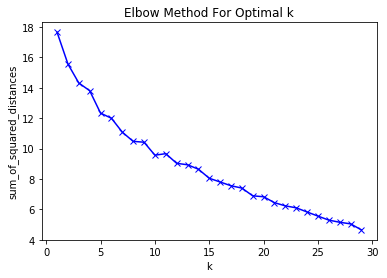

In [598]:
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

Here a 'knee' is not clear. So this method is not very helpful perhaps we look at anouth method such as silhuoette method.

## K-means silhouette method

explanation of choosing right k 
https://uc-r.github.io/kmeans_clustering

In [604]:
from sklearn.metrics import silhouette_score
sil = []
K_sil = range(2,30)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(toronto_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(toronto_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

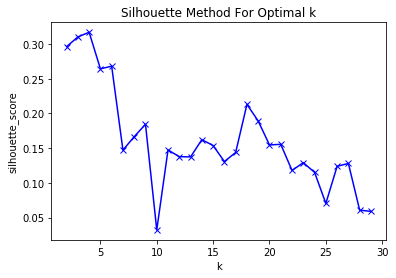

In [605]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

Silhouette method suggests 4 clusters maximise the average silhouette values, 10 clusters coming in as second optimal number of clusters.

Lets model with k=4

In [654]:
# set number of clusters
kclusters = 4


toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0], dtype=int32)

Create dataframe that adds custer labels.

In [681]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted
toronto_merged = toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
toronto_merged = toronto_merged.dropna(subset = ['Cluster Labels'])

#reset index of rows 
toronto_merged.reset_index(inplace = True, drop=True)
toronto_merged = toronto_merged.astype({"Cluster Labels": int })
toronto_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2,Fast Food Restaurant,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,Construction & Landscaping,Bar,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Breakfast Spot,Intersection,Bank,Rental Car Location,Electronics Store,Medical Center,Mexican Restaurant,Yoga Studio,Drugstore,Doner Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Korean Restaurant,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Caribbean Restaurant,Fried Chicken Joint,Bank,Athletics & Sports,Thai Restaurant,Gas Station,Bakery,Hakka Restaurant,Electronics Store,Eastern European Restaurant


Visualize the resulting clusters.

In [682]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [657]:
required_column_indices = [6,7,1]
required_column = [list(toronto_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [6,7,1]

required_column

['1st Most Common Venue', '2nd Most Common Venue', 'Borough']

## Cluster 0

In [658]:
cluster_0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[1:12]]
cluster_0.head(5)

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
1,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,Construction & Landscaping,Bar,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Breakfast Spot,Intersection,Bank,Rental Car Location,Electronics Store,Medical Center
3,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Korean Restaurant,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run
4,Scarborough,Cedarbrae,43.773136,-79.239476,0,Caribbean Restaurant,Fried Chicken Joint,Bank,Athletics & Sports,Thai Restaurant,Gas Station
5,Scarborough,Scarborough Village,43.744734,-79.239476,0,Playground,Construction & Landscaping,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run


In [659]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Coffee Shop                   17
Pizza Place                    7
Grocery Store                  7
Café                           6
Clothing Store                 4
Sandwich Place                 4
Gym                            3
Breakfast Spot                 2
Park                           2
Fast Food Restaurant           2
Light Rail Station             1
Bus Line                       1
Portuguese Restaurant          1
Pet Store                      1
Airport Service                1
Motel                          1
Bakery                         1
Middle Eastern Restaurant      1
Playground                     1
Metro Station                  1
Discount Store                 1
Ramen Restaurant               1
Greek Restaurant               1
Chinese Restaurant             1
Trail                          1
Rental Car Location            1
Field                          1
Yoga Studio                    1
Pharmacy                       1
Mexican Restaurant             1
Caribbean 

## Cluster 1

In [660]:
cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[1:12]]
cluster_1.head(5)

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
89,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,1,Baseball Field,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop
93,North York,"Humberlea, Emery",43.724766,-79.532242,1,Baseball Field,Food Service,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant


In [661]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Baseball Field    2
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Food Service    1
Yoga Studio     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
North York
    1
Etobicoke
     1
Name: Borough, dtype: int64
---------------------------------------------


## Cluster 2

In [662]:
cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[1:12]]
cluster_2.head(5)

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2,Fast Food Restaurant,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant


In [663]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Yoga Studio    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Scarborough
    1
Name: Borough, dtype: int64
---------------------------------------------


## Cluster 3

In [664]:
cluster_3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[1:12]]
cluster_3.head(5)

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
14,Scarborough,"Milliken, Agincourt North, Steeles East, L'Amo...",43.815252,-79.284577,3,Park,Playground,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center
21,North York,York Mills West,43.752758,-79.400049,3,Park,Convenience Store,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run
23,North York,Parkwoods,43.753259,-79.329656,3,Food & Drink Shop,Fireworks Store,Park,Eastern European Restaurant,Distribution Center,Dog Run
38,East York,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,3,Park,Intersection,Convenience Store,Metro Station,Yoga Studio,Dumpling Restaurant
42,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Park,Bus Line,Swim School,Filipino Restaurant,Distribution Center,Dog Run


In [666]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Park                 8
Food & Drink Shop    1
Gym                  1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Playground           2
Convenience Store    2
River                1
Fireworks Store      1
Bus Line             1
Park                 1
Women's Store        1
Intersection         1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
North York
          2
Central Toronto
     2
York
                2
East York
           1
Etobicoke
           1
Scarborough
         1
Downtown Toronto
    1
Name: Borough, dtype: int64
---------------------------------------------


## Labelling the clusters
 Having observed the different venues in each of the clusters we can see that each cluser can be distinguised as such: 
 1. cluster 0 is has quite a broad variety of venues, the most popular being Coffee shops, restaurants and shopping facilites.
 2. Cluster 1 has only two areas with most popular venues consisting of baseball field, food service and yoga studio.
 3. Cluster 2 has only 1 area and constains mostly of take-aways so assume its less populated as less shops.
 4. Cluster 3 contains a few areas with most popular venues being parks, playgrounds and food stores.

We can label them 

1. Popular high-street areas
2. Sporting facility
3. Less populated area
4. Park/Playground areas

In [683]:
mapping = {0: 'Popular high-street areas', 1: 'Sport areas', 2: 'Less populated areas', 3: 'Park/Playground areas'}

new_labels = toronto_merged.replace({'Cluster Labels': mapping})
toronto_merged['New Cluster Labels'] = new_labels['Cluster Labels']
toronto_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,New Cluster Labels
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2,Fast Food Restaurant,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Less populated areas
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,0,Construction & Landscaping,Bar,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Popular high-street areas
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Breakfast Spot,Intersection,Bank,Rental Car Location,Electronics Store,Medical Center,Mexican Restaurant,Yoga Studio,Drugstore,Doner Restaurant,Popular high-street areas
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,Coffee Shop,Korean Restaurant,Yoga Studio,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Popular high-street areas
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Caribbean Restaurant,Fried Chicken Joint,Bank,Athletics & Sports,Thai Restaurant,Gas Station,Bakery,Hakka Restaurant,Electronics Store,Eastern European Restaurant,Popular high-street areas


In [684]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, label in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels'], toronto_merged['New Cluster Labels']):
    label = folium.Popup(str(poi) + str(label), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

So now we have been able to cluster the areas of toronto into 3 different groups 


1. Popular high-street areas
2. Sporting facility
3. Less populated area
4. Park/Playground areas

and we are able to display this on the map with each neighbourhood pin displaying the area type.